In [1]:
### import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Data Processsing

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
df.dropna(axis=1,inplace=True)

In [8]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

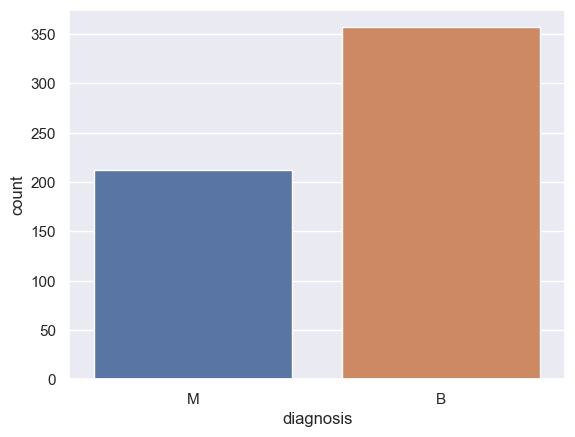

In [11]:
sns.countplot(x="diagnosis",data=df)
plt.show()

In [12]:
# Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.iloc[:,1]=le.fit_transform(df.iloc[:,1].values)

In [13]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,1.0950,0.9053,8.5890,153.400,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.711900,0.265400,0.4601,0.11890
1,842517,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.3980,74.080,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.186000,0.2750,0.08902
2,84300903,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.5850,94.030,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.243000,0.3613,0.08758
3,84348301,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.4450,27.230,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.257500,0.6638,0.17300
4,84358402,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.4380,94.440,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.400000,0.162500,0.2364,0.07678
5,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,2.2170,27.190,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.535500,0.174100,0.3985,0.12440
6,844359,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.4467,0.7732,3.1800,53.910,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.193200,0.3063,0.08368
7,84458202,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,0.5835,1.3770,3.8560,50.960,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.267800,0.155600,0.3196,0.11510
8,844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,2.4060,24.320,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.539000,0.206000,0.4378,0.10720
9,84501001,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,2.0390,23.940,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.105000,0.221000,0.4366,0.20750


In [14]:
data_mean=df.iloc[:,1:11]

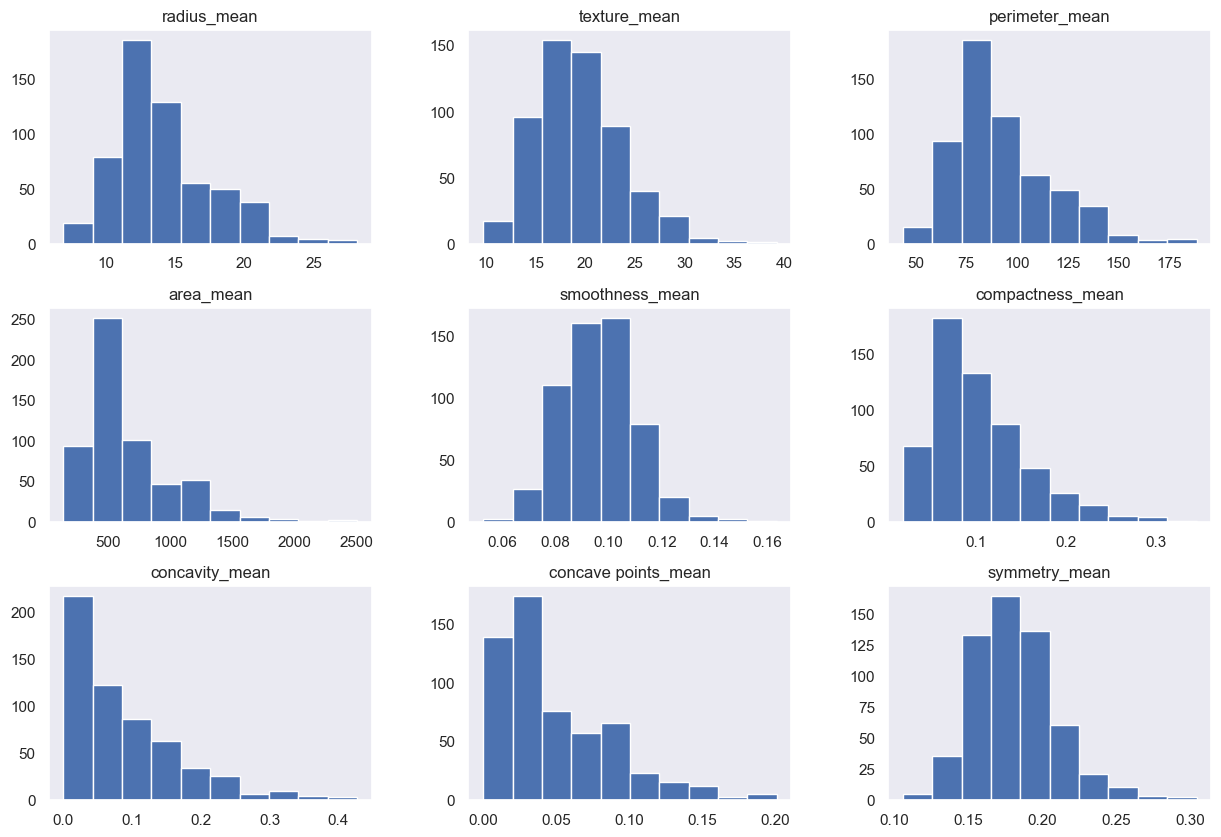

In [15]:
hist_mean=data_mean.hist(bins=10,figsize=(15,10),grid=False)

<Axes: >

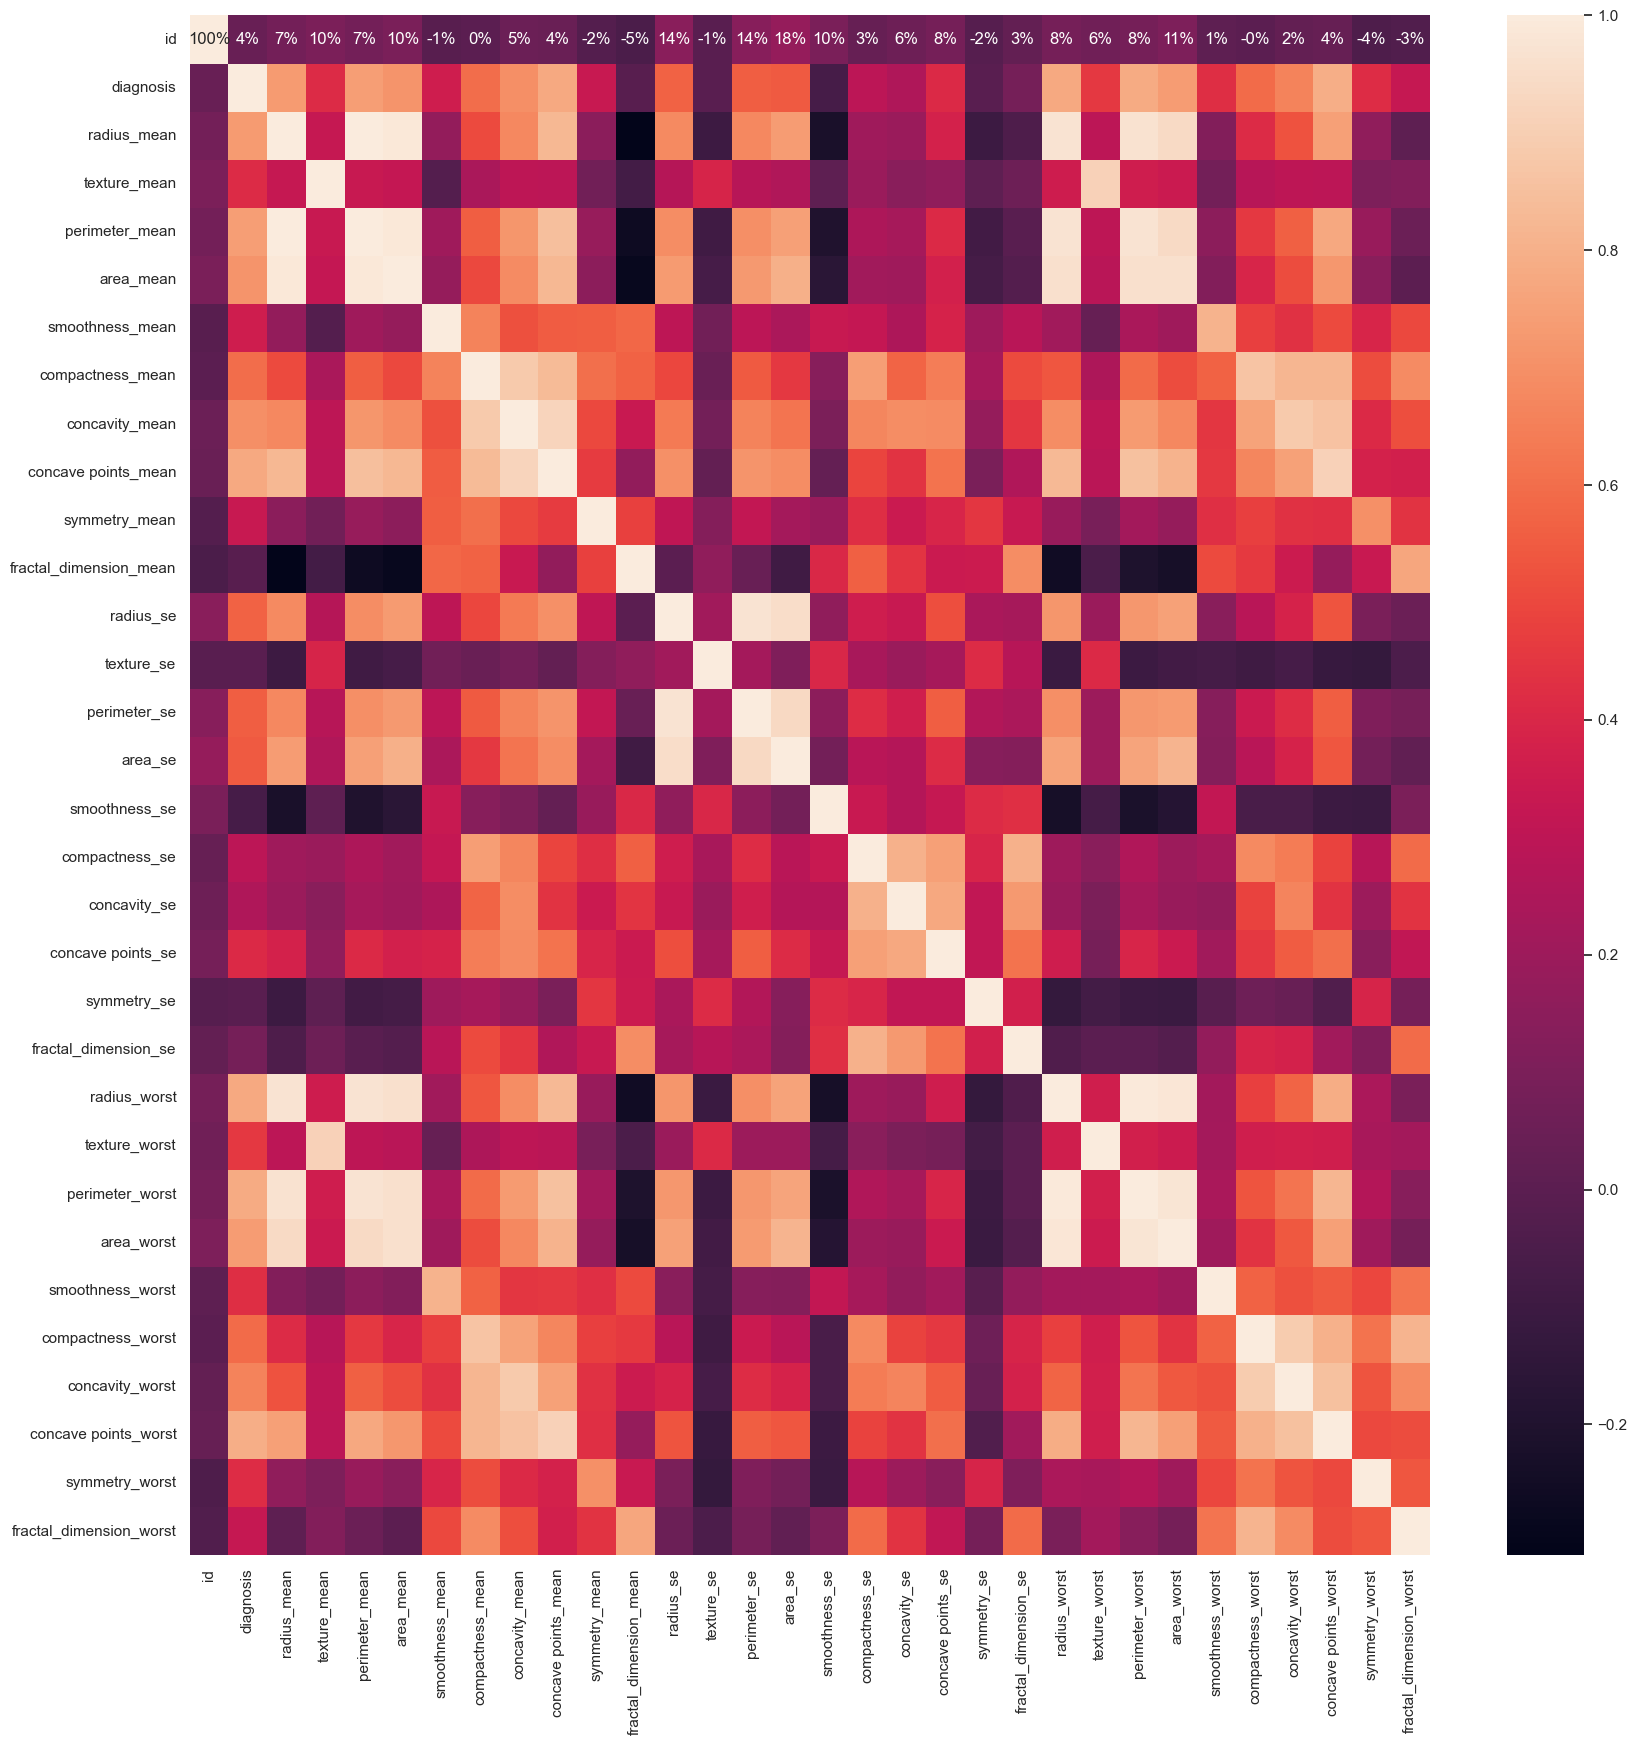

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt=".0%")

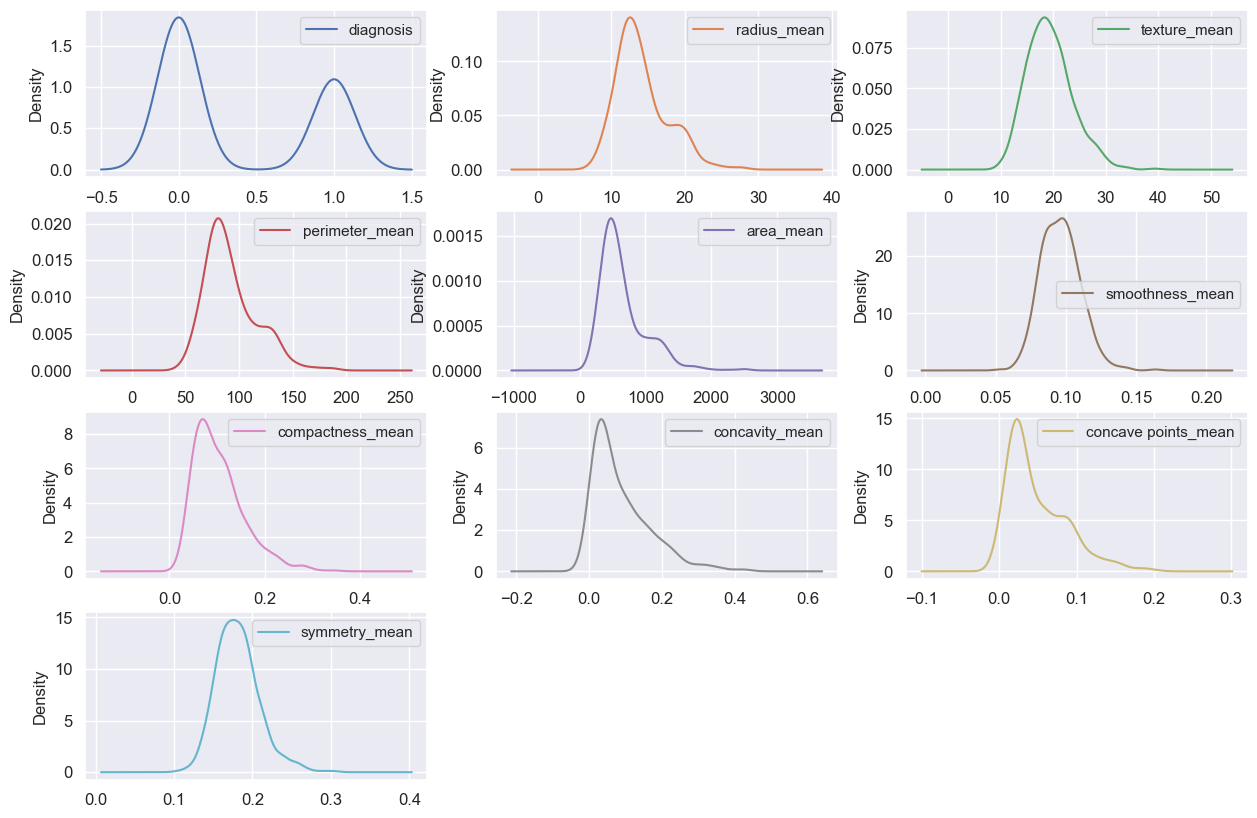

In [17]:
plt=data_mean.plot(kind="density",subplots=True,layout=(4,3),sharex=False,sharey=False,fontsize=12,figsize=(15,10))

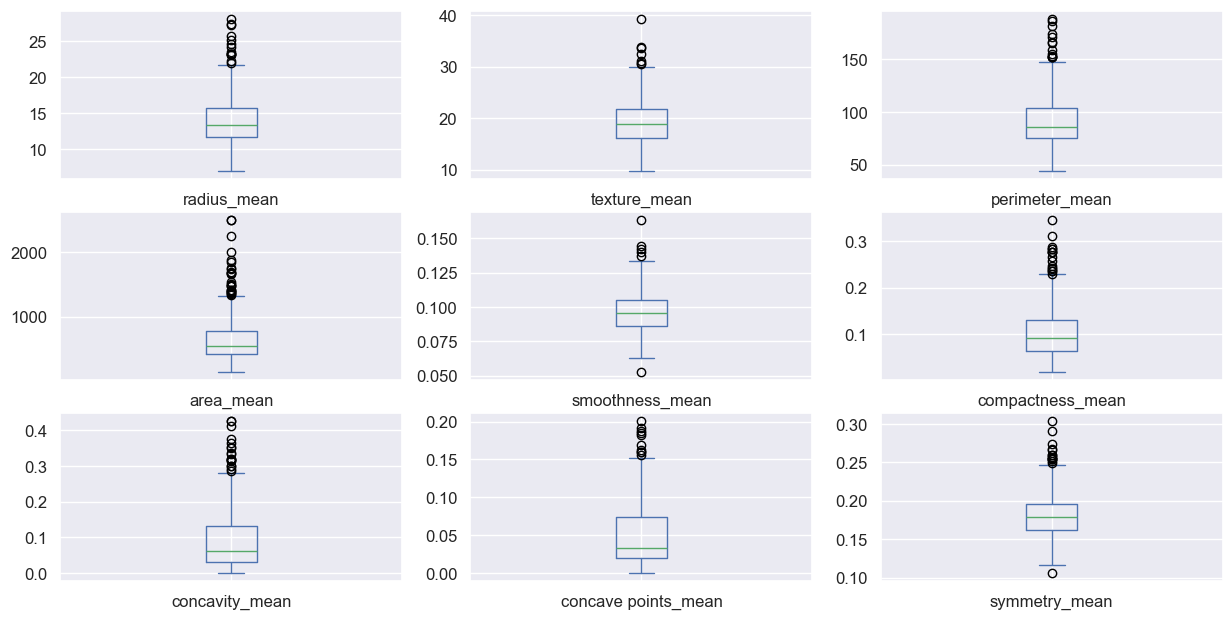

In [18]:
plt=data_mean.plot(kind="box",subplots=True,layout=(4,3),sharex=False,sharey=False,fontsize=12,figsize=(15,10))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [20]:
# Drop the id column
df.drop(["id"],axis=1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,1.0950,0.9053,8.5890,153.400,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.711900,0.265400,0.4601,0.11890
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.3980,74.080,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.186000,0.2750,0.08902
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.5850,94.030,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.243000,0.3613,0.08758
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.4450,27.230,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.257500,0.6638,0.17300
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.4380,94.440,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.400000,0.162500,0.2364,0.07678
5,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,2.2170,27.190,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.535500,0.174100,0.3985,0.12440
6,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.4467,0.7732,3.1800,53.910,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.193200,0.3063,0.08368
7,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,0.5835,1.3770,3.8560,50.960,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.267800,0.155600,0.3196,0.11510
8,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,2.4060,24.320,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.539000,0.206000,0.4378,0.10720
9,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,2.0390,23.940,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.105000,0.221000,0.4366,0.20750


# Data Transformation using label encoder(df)

In [21]:
##Data processing fns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
df["diagnosis"]=le.fit_transform(df["diagnosis"])

In [23]:
df.dtypes

id                           int64
diagnosis                    int32
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

# Spliting the data sets

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x=df.drop(["diagnosis"],axis=1)
y=df["diagnosis"].values

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [27]:
print(x_train)

            id  radius_mean  texture_mean  perimeter_mean  area_mean  \
478     911685       11.490         14.59           73.99      404.9   
303     892657       10.490         18.61           66.86      334.3   
155    8711003       12.250         17.94           78.27      460.3   
186     874217       18.310         18.58          118.60     1041.0   
101     862722        6.981         13.43           43.79      143.5   
97      862261        9.787         19.94           62.11      294.5   
20     8510653       13.080         15.71           85.63      520.0   
153      87106       11.150         13.08           70.87      381.9   
54      857438       15.100         22.02           97.26      712.8   
30      853401       18.630         25.11          124.80     1088.0   
531   91903901       11.670         20.02           75.21      416.2   
49      857156       13.490         22.30           86.91      561.0   
100     862717       13.610         24.98           88.05      5

In [28]:
print(y_train)

[0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0
 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0
 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0
 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0
 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0
 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0]


# Model Building

In [31]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [33]:
# make class predictions for the testing set
y_pred_class = logreg.predict(x_test)

In [34]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.631578947368421


In [35]:
print("Logistic Regression Accuracy : {:.2f}%".format(logreg.score(x_test,y_test)*100))

Logistic Regression Accuracy : 63.16%


# Confusion matrix

Table that describes the performance of a classification model

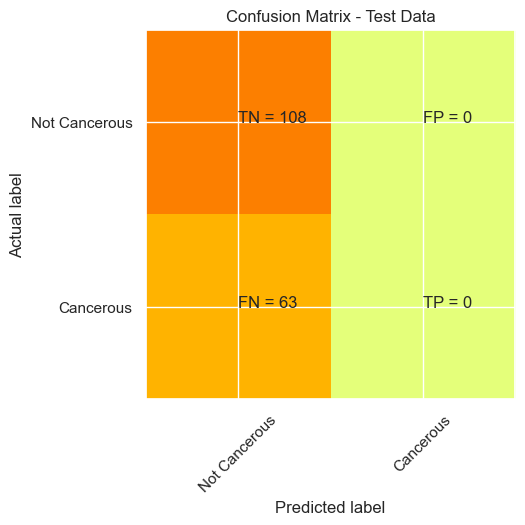

In [36]:
import matplotlib.pyplot as plt
import numpy as np

cm = metrics.confusion_matrix(y_test, y_pred_class)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Not Cancerous','Cancerous']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [37]:
TP = 0
TN = 108
FP = 0
FN = 63

In [38]:
acc=TP+TN/(TP+TN+FP+FN)

In [39]:
print(acc)

0.631578947368421


# Adjusting the classification threshold

In [41]:
# print the first 10 predicted class with default threshold of .5
logreg.predict(x_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(x_test)[0:10, :]

array([[0.50019002, 0.49980998],
       [0.5018909 , 0.4981091 ],
       [0.50018871, 0.49981129],
       [0.50018514, 0.49981486],
       [0.50017741, 0.49982259],
       [0.50019013, 0.49980987],
       [0.50001873, 0.49998127],
       [0.50018547, 0.49981453],
       [0.50019114, 0.49980886],
       [0.50018648, 0.49981352]])

In [43]:
# print the first 10 predicted probabilities for class 1  (diabetics)
logreg.predict_proba(x_test)[0:10, 1]

array([0.49980998, 0.4981091 , 0.49981129, 0.49981486, 0.49982259,
       0.49980987, 0.49998127, 0.49981453, 0.49980886, 0.49981352])

In [46]:
# store the predicted probabilities for diabetic class for all records... 
y_pred_prob = logreg.predict_proba(x_test)[:, 1]

# Reduce the threshold from .5 to .2 to predict the cancer class. This will make the model sensitive to cancer class

In [55]:
  # deciding the class of the 1st 10 records based on new threshold
from sklearn.preprocessing import binarize

# Assuming y_pred_prob is an array of predicted probabilities
# You can binarize it using the threshold of 0.3
y_pred_class = binarize([y_pred_prob], threshold=0.2)[0]

In [56]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.49980998, 0.4981091 , 0.49981129, 0.49981486, 0.49982259,
       0.49980987, 0.49998127, 0.49981453, 0.49980886, 0.49981352])

In [57]:
# print the first 10 predicted classes with the lower threshold. Note the change in class...
# with threshold of .5 (default) , the first data point would belong to 0 class i.e. non-diabetic 
y_pred_class[0:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [58]:
# previous confusion matrix (default threshold of 0.5)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[  0 108]
 [  0  63]]


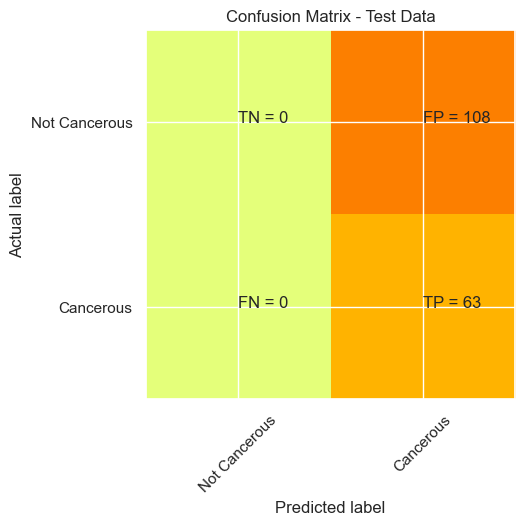

In [59]:
cm = metrics.confusion_matrix(y_test, y_pred_class)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Not Cancerous','Cancerous']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [52]:
TP = 63
TN = 0
FP = 108
FN = 0

In [53]:
acc=TP+TN/(TP+TN+FP+FN)

In [54]:
print(acc)

63.0


# ROC Curves and Area Under the Curve (AUC)

Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?

Answer: Plot the ROC curve!

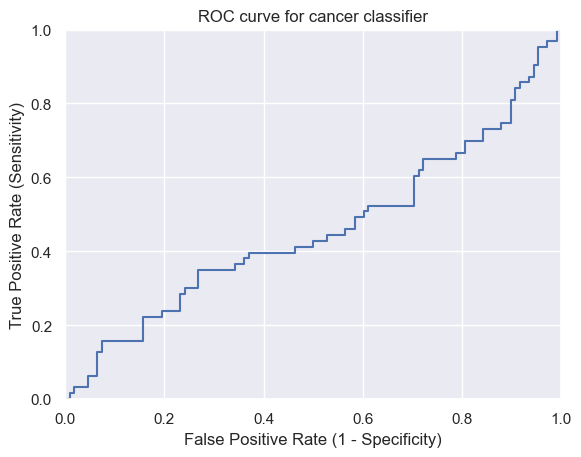

In [63]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context
You can't actually see the thresholds used to generate the curve on the ROC curve itself

In [64]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [65]:
evaluate_threshold(0.5)

Sensitivity: 0.0
Specificity: 1.0


In [66]:
evaluate_threshold(0.2)

Sensitivity: 1.0
Specificity: 0.0


In [67]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.4570840681951792


In [69]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, x, y, cv=10, scoring='roc_auc').mean()

0.5326747062461348

# Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB()

In [71]:
print("Naive Bayes Accuracy : {:.2f}%".format(classifier.score(x_test,y_test)*100))

Naive Bayes Accuracy : 63.74%


In [72]:
classifier.score(x_test,y_test)

0.6374269005847953

In [76]:
predictions=classifier.predict(x_test)

In [77]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [78]:
conf_matrix=confusion_matrix(y_test,predictions)

In [79]:
print(conf_matrix)

[[107   1]
 [ 61   2]]


<Axes: >

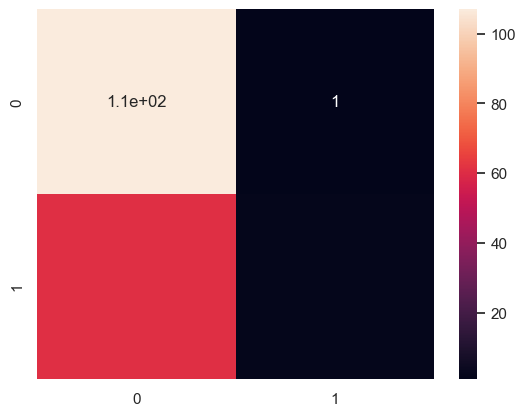

In [80]:
sns.heatmap(conf_matrix, annot=True)

# Support Vector Classifier

In [82]:
from sklearn.svm import SVC

In [83]:
svc=SVC()
svc.fit(x_train, y_train) 
svc.score(x_test,y_test)

0.631578947368421

In [84]:
print("Support Vector Accuracy : {:.2f}%".format(svc.score(x_test,y_test)*100))

Support Vector Accuracy : 63.16%


In [85]:
predictions2=svc.predict(x_test)

In [86]:
conf_matrix2=confusion_matrix(y_test,predictions2)

In [87]:
print(conf_matrix2)

[[108   0]
 [ 63   0]]


<Axes: >

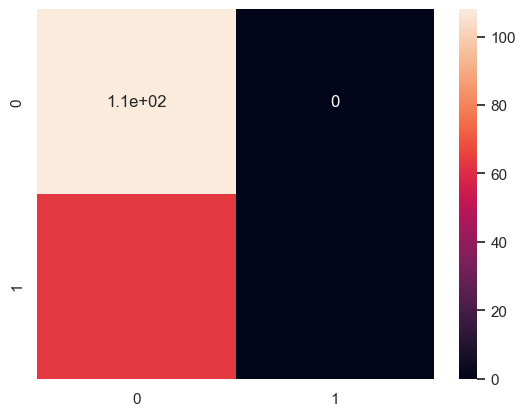

In [88]:
sns.heatmap(conf_matrix2, annot=True)

# K Nearest Neighbour 

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
knn=KNeighborsClassifier(n_neighbors=9)

In [91]:
knn.fit(x_train, y_train) 
knn.score(x_test,y_test)

0.7017543859649122

In [92]:
print("K Nearest Neighbors Accuracy : {:.2f}%".format(knn.score(x_test,y_test)*100))

K Nearest Neighbors Accuracy : 70.18%


In [93]:
predictions3=knn.predict(x_test)

In [94]:
conf_matrix3=confusion_matrix(y_test,predictions3)

In [95]:
print(conf_matrix3)

[[104   4]
 [ 47  16]]


<Axes: >

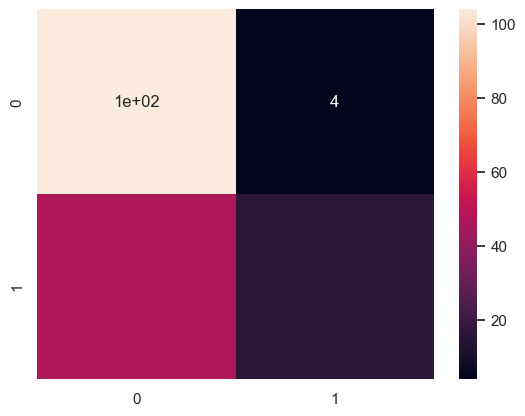

In [96]:
sns.heatmap(conf_matrix3, annot=True)

# Decision Tree classifier

In [97]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [98]:
print("Decision Tree Classifier : {:.2f}%".format(dtc.score(x_test,y_test)*100))

Decision Tree Classifier : 91.81%


In [99]:
predictions4=dtc.predict(x_test)

In [100]:
conf_matrix4=confusion_matrix(y_test,predictions4)

In [101]:
print(conf_matrix4)

[[97 11]
 [ 3 60]]


<Axes: >

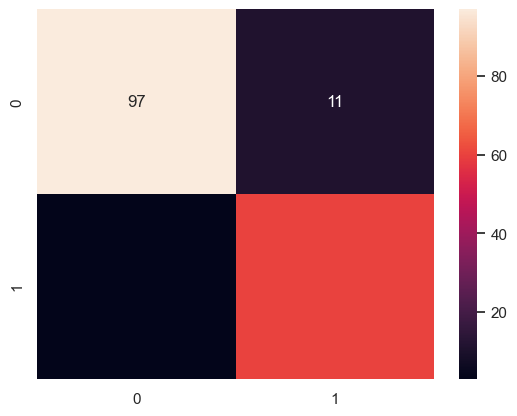

In [102]:
sns.heatmap(conf_matrix4, annot=True)

[Text(0.6725, 0.9375, 'x[28] <= 0.142\ngini = 0.468\nsamples = 398\nvalue = [249, 149]'),
 Text(0.545, 0.8125, 'x[21] <= 17.615\ngini = 0.147\nsamples = 263\nvalue = [242, 21]'),
 Text(0.41, 0.6875, 'x[14] <= 35.26\ngini = 0.077\nsamples = 250\nvalue = [240, 10]'),
 Text(0.26, 0.5625, 'x[28] <= 0.136\ngini = 0.034\nsamples = 232\nvalue = [228, 4]'),
 Text(0.16, 0.4375, 'x[20] <= 0.001\ngini = 0.018\nsamples = 226\nvalue = [224, 2]'),
 Text(0.08, 0.3125, 'x[0] <= 863404.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.04, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.12, 0.1875, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.24, 0.3125, 'x[22] <= 32.78\ngini = 0.009\nsamples = 219\nvalue = [218, 1]'),
 Text(0.2, 0.1875, 'gini = 0.0\nsamples = 202\nvalue = [202, 0]'),
 Text(0.28, 0.1875, 'x[22] <= 33.805\ngini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(0.24, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.32, 0.0625, 'gini = 0.0\nsamples = 16\nv

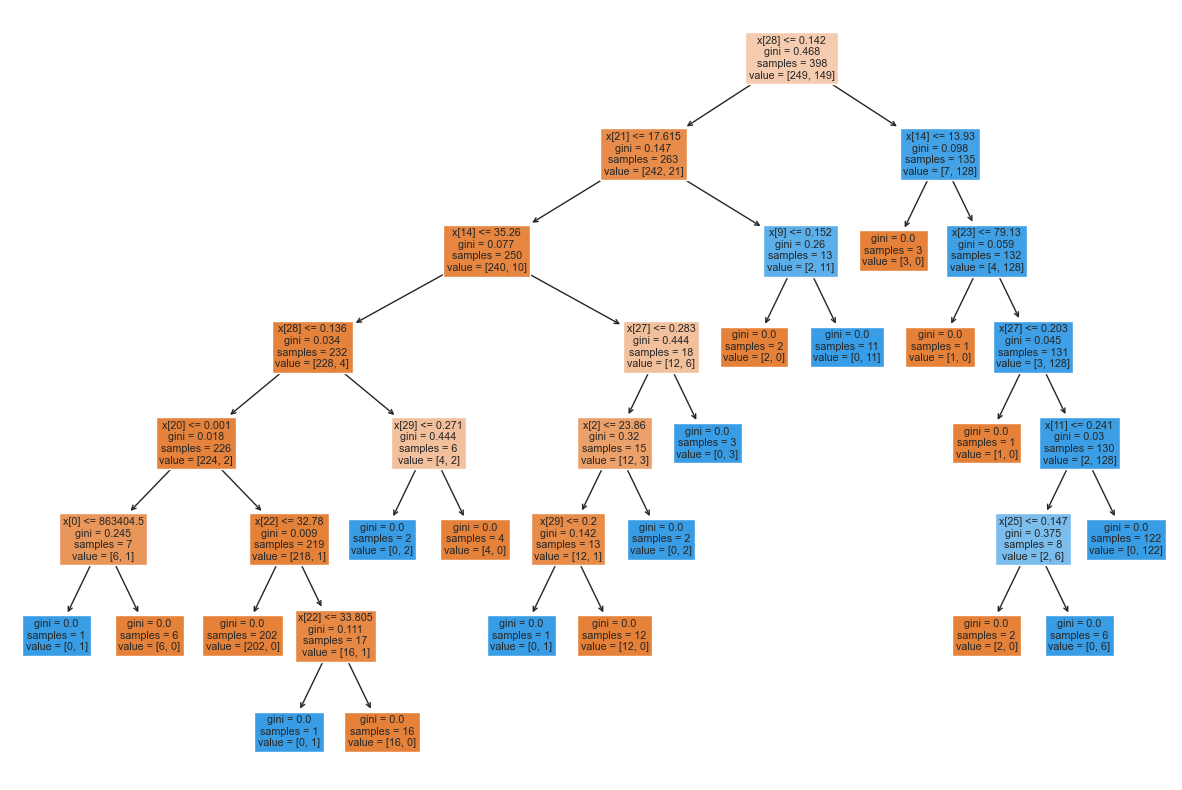

In [103]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True)

# Random Forest Classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rf=RandomForestClassifier(n_estimators=1000,random_state=1)

In [106]:
rf.fit(x_train, y_train)
print("Random Forest Classifier : {:.2f}%".format(rf.score(x_test,y_test)*100))

Random Forest Classifier : 96.49%


In [107]:
predictions5=rf.predict(x_test)

In [108]:
conf_matrix5=confusion_matrix(y_test,predictions5)

In [109]:
print(conf_matrix5)

[[104   4]
 [  2  61]]


<Axes: >

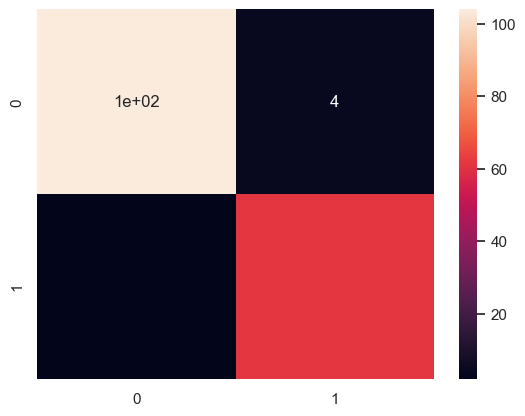

In [111]:
sns.heatmap(conf_matrix5, annot=True)

# Bagging

In [112]:
from sklearn.ensemble import BaggingClassifier

In [113]:
bgc=BaggingClassifier(n_estimators=23)

In [114]:
bgc.fit(x_train, y_train)

BaggingClassifier(n_estimators=23)

In [115]:
print(bgc.score(x_train, y_train))
print(bgc.score(x_test,y_test))

1.0
0.9649122807017544


In [116]:
print("Bagging Classifier : {:.2f}%".format(bgc.score(x_test,y_test)*100))

Bagging Classifier : 96.49%


In [117]:
predictions6=bgc.predict(x_test)

In [118]:
conf_matrix6=confusion_matrix(y_test,predictions6)

In [119]:
print(conf_matrix6)

[[103   5]
 [  1  62]]


<Axes: >

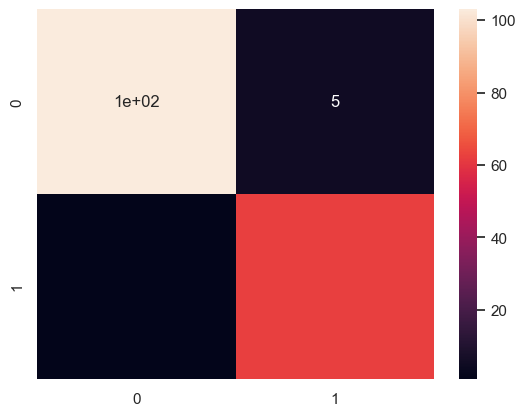

In [120]:
sns.heatmap(conf_matrix6, annot=True)

# XGBOOST

In [121]:
import xgboost

In [122]:
xg=xgboost.XGBClassifier()

In [123]:
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [124]:
print(xg.score(x_train, y_train))
print(xg.score(x_test,y_test))

1.0
0.9766081871345029


In [125]:
print("XG-Boost Classifier : {:.2f}%".format(xg.score(x_test,y_test)*100))

XG-Boost Classifier : 97.66%


In [126]:
predictions7=xg.predict(x_test)

In [127]:
conf_matrix7=confusion_matrix(y_test,predictions7)

In [128]:
print(conf_matrix7)

[[106   2]
 [  2  61]]


<Axes: >

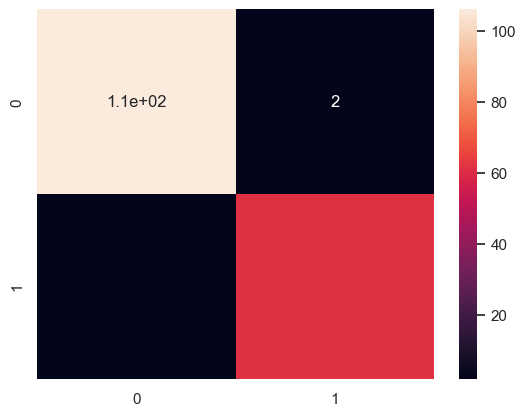

In [129]:
sns.heatmap(conf_matrix7, annot=True)

# Adaboost

In [130]:
from sklearn.ensemble import AdaBoostClassifier

In [131]:
abc=AdaBoostClassifier()

In [132]:
abc.fit(x_train, y_train)

AdaBoostClassifier()

In [133]:
print(abc.score(x_train, y_train))
print(abc.score(x_test,y_test))

1.0
0.9707602339181286


In [134]:
print("Adaboost Classifier : {:.2f}%".format(abc.score(x_test,y_test)*100))

Adaboost Classifier : 97.08%


In [135]:
predictions8=abc.predict(x_test)

In [136]:
conf_matrix8=confusion_matrix(y_test,predictions8)

In [137]:
print(conf_matrix8)

[[106   2]
 [  3  60]]


<Axes: >

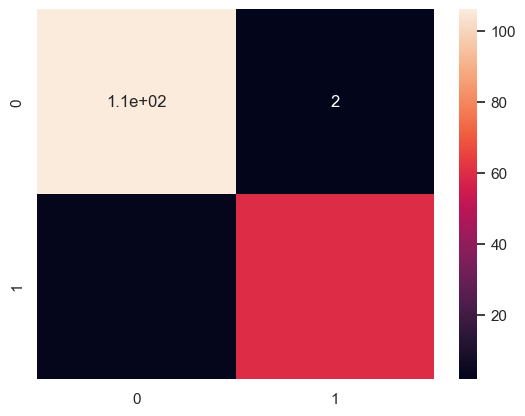

In [138]:
sns.heatmap(conf_matrix8, annot=True)

# Gradient Boosting Classifier

In [139]:
from sklearn.ensemble import GradientBoostingClassifier

In [140]:
gbc=GradientBoostingClassifier()

In [141]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [142]:
print(gbc.score(x_train, y_train))
print(gbc.score(x_test,y_test))

1.0
0.9649122807017544


In [143]:
print("Gradient boost Classifier : {:.2f}%".format(gbc.score(x_test,y_test)*100))

Gradient boost Classifier : 96.49%


In [144]:
predictions9=gbc.predict(x_test)

In [145]:
conf_matrix9=confusion_matrix(y_test,predictions9)

In [146]:
print(conf_matrix9)

[[105   3]
 [  3  60]]


<Axes: >

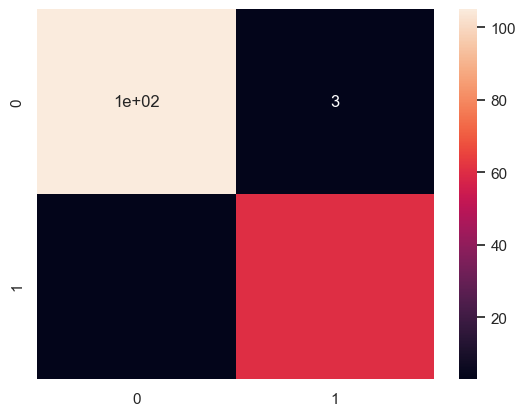

In [147]:
sns.heatmap(conf_matrix9, annot=True)